In [1]:
import re
import pandas as pd
import numpy as np

In [5]:
normal=pd.read_csv('D:/study/Fake/Legitimate_user_new_tweets.csv')
spam=pd.read_csv('D:/study/Fake/Polluter_new_tweets.csv')



In [6]:
normal.dropna(axis=1,inplace=True)
normal.columns=['id','text','time']
normal['isSpam']=0

print(len(normal))

130049


In [7]:
spam.dropna(axis=1,inplace=True)
spam.columns=['id','text','time']
spam['isSpam']=1

print(spam)

               id                                               text  \
0            6301   Seaside PNW Wedding with Greenery Details at ...   
1            6301   Whimsical stylish wedding in a Brooklyn brown...   
2            6301   Beautiful Burgundy Hindu Fusion Wedding https...   
3            6301   Chloe and Mike’s Classic Wedding at Moby Dick...   
4            6301   Emily and Shaun’s Italian Inspired Wedding in...   
5            6301   Behind the Scenes Look at an Autumn Floral Wo...   
6            6301   Cocktail Friday – Coogee Bay Hotel’s Indulgen...   
7            6301   Friday Roundup https://t.co/rVwDBReLqy https:...   
8            6301   Take These Steps To Ensure A Stress Free Enga...   
9            6301   Eclectic &amp; Earthy Livermore Wedding at We...   
10           6301   How to Decide Which Photography Style Is Righ...   
11           6301   A Refined Tropical Wedding at the Four Season...   
12           6301   This Tool Makes it Easy to Find Wedding Rent

In [8]:
df=pd.concat([normal,spam],axis=0)


In [9]:
p2 = re.compile(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))'
                r'(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
def findurl(text):
    url=p2.findall(text)
    if len(url)<1:
        url=np.nan
    else:
        url=",".join(url)
    return url
def removeurl(text):
    text=re.sub(p2,'',text)
    return text
df['finalurl']=df['text'].apply(findurl)
df['text']=df['text'].apply(removeurl)

In [10]:
df.dropna(axis=0,inplace=True)


In [11]:
df2 = df.drop('finalurl', axis=1).join(df['finalurl']
                                                    .str.split(",", expand=True).stack()
                                                    .reset_index(level=1, drop=True)
                                                    .rename('finalurl'))
df2=df2.reset_index(drop=True)
print(df2.head(100))

       id                                               text  \
0     614   @BrowneSebright @juliebjornstad I’m a huge fa...   
1     614   @BrowneSebright @juliebjornstad I’m a huge fa...   
2     614   @BrowneSebright @juliebjornstad I’m a huge fa...   
3    6301   Seaside PNW Wedding with Greenery Details at ...   
4    6301   Seaside PNW Wedding with Greenery Details at ...   
5    6301   Seaside PNW Wedding with Greenery Details at ...   
6     614   My friend Emily Brown of Emily Brown music is...   
7     614   My friend Emily Brown of Emily Brown music is...   
8     614   My friend Emily Brown of Emily Brown music is...   
9    6301   Whimsical stylish wedding in a Brooklyn brown...   
10   6301   Whimsical stylish wedding in a Brooklyn brown...   
11   6301   Whimsical stylish wedding in a Brooklyn brown...   
12   6301          Beautiful Burgundy Hindu Fusion Wedding     
13   6301          Beautiful Burgundy Hindu Fusion Wedding     
14    614   Live… from Provo?! Yup. I’m 

In [12]:
df2['time'].value_counts()

 2017-11-20 03:54:03    26
 2017-11-20 03:54:02    22
 2013-05-10 10:59:14    18
 2019-04-08 19:20:46    18
 2010-09-02 00:23:28    17
 2010-08-02 09:10:04    16
 2013-08-19 20:37:37    15
 2019-04-11 15:30:00    15
 2019-04-11 23:21:30    14
 2013-05-09 19:27:38    14
 2017-11-13 11:47:03    13
 2019-04-08 19:20:47    13
 2019-04-11 14:00:00    13
 2013-05-10 07:23:04    12
 2019-03-09 15:51:00    12
 2019-03-07 15:42:10    12
 2010-09-08 06:04:40    12
 2013-08-20 03:29:51    12
 2011-07-07 00:53:27    11
 2019-01-06 22:27:15    11
 2013-08-08 15:25:11    11
 2010-09-08 03:49:42    11
 2019-04-11 18:04:21    11
 2017-05-10 13:31:00    11
 2019-04-08 19:20:48    11
 2013-05-09 03:31:44    11
 2013-07-22 12:35:31    11
 2012-06-19 08:04:28    11
 2013-03-09 05:00:14    11
 2019-04-11 15:00:01    10
                        ..
 2014-03-18 18:56:56     1
 2010-02-24 05:18:16     1
 2010-08-24 06:15:47     1
 2019-01-31 11:16:42     1
 2013-07-05 01:37:08     1
 2010-08-15 23:32:00     1
 

In [13]:
mask=df2['finalurl']!='empty'
url=df2.loc[mask] 
print(url["time"].value_counts())

 2017-11-20 03:54:03    26
 2017-11-20 03:54:02    22
 2013-05-10 10:59:14    18
 2019-04-08 19:20:46    18
 2010-09-02 00:23:28    17
 2010-08-02 09:10:04    16
 2013-08-19 20:37:37    15
 2019-04-11 15:30:00    15
 2019-04-11 23:21:30    14
 2013-05-09 19:27:38    14
 2017-11-13 11:47:03    13
 2019-04-08 19:20:47    13
 2019-04-11 14:00:00    13
 2013-05-10 07:23:04    12
 2019-03-09 15:51:00    12
 2019-03-07 15:42:10    12
 2010-09-08 06:04:40    12
 2013-08-20 03:29:51    12
 2011-07-07 00:53:27    11
 2019-01-06 22:27:15    11
 2013-08-08 15:25:11    11
 2010-09-08 03:49:42    11
 2019-04-11 18:04:21    11
 2017-05-10 13:31:00    11
 2019-04-08 19:20:48    11
 2013-05-09 03:31:44    11
 2013-07-22 12:35:31    11
 2012-06-19 08:04:28    11
 2013-03-09 05:00:14    11
 2019-04-11 15:00:01    10
                        ..
 2014-03-18 18:56:56     1
 2010-02-24 05:18:16     1
 2010-08-24 06:15:47     1
 2019-01-31 11:16:42     1
 2013-07-05 01:37:08     1
 2010-08-15 23:32:00     1
 

In [14]:
from multiprocessing import Pool
from SpamDetection import run
import math
res= []
count=0
processor=20
p=Pool(processor)
l_data = len(df2)
size = math.ceil(l_data / processor)


for i in range(processor):
    start = size * i
    end = (i + 1) * size if (i + 1) * size < l_data else l_data
    tmp = df2[start:end]
    tmp.to_csv('D:/study/Fake/url_'+str(i)+'.csv',index=False)
    print(len(tmp))
for i in range(processor):
    res.append(p.apply_async(run, args=(i,)))
    print(str(i) + ' processor started !')
p.close()
p.join()      
print('successful')

19928

19928

19928

19928

19928

19928

19928

19928

19928

19928

19928

19928

19928

19928

19928

19928

19928

19928

19928

19927

0 processor started !

1 processor started !

2 processor started !

3 processor started !

4 processor started !

5 processor started !

6 processor started !

7 processor started !

8 processor started !

9 processor started !

10 processor started !

11 processor started !

12 processor started !

13 processor started !

14 processor started !

15 processor started !

16 processor started !

17 processor started !

18 processor started !

19 processor started !

In [15]:
final=[]
for i in res:
    final+=i.get()
print(final[0])


# spamfinal=pd.DataFrame(final,columns=['id','text''finlurl',])

[614, ' @BrowneSebright @juliebjornstad I’m a huge fan of protected bike lanes. For me it’s not a matter of whether but wh… ', ' 2019-04-11 04:12:06', 0, 'https://twitter.com/i/web/status/1116192171353186305']

In [16]:
final=pd.DataFrame(final,columns=['id','text','time','isSpam','finalurl'])

In [10]:
mask=df2['finalurl']=='empty'
no_url=df2.loc[mask] 
finaldf=pd.concat([no_url,final],axis=0)

In [81]:
finaldf["time"].value_counts()

 2017-11-20 03:54:03    26
 2017-11-20 03:54:02    22
 2013-05-10 10:59:14    18
 2019-04-08 19:20:46    18
 2010-09-02 00:23:28    17
 2019-04-11 15:30:00    15
 2013-08-19 20:37:37    15
 2013-05-09 19:27:38    14
 2019-04-11 23:21:30    14
 2019-04-08 19:20:47    13
 2017-11-13 11:47:03    13
 2019-03-07 15:42:10    12
 2010-09-08 06:04:40    12
 2010-08-02 09:10:04    12
 2013-05-10 07:23:04    12
 2013-08-20 03:29:51    12
 2019-04-08 19:20:48    11
 2010-09-08 03:49:42    11
 2013-03-09 05:00:14    11
 2013-08-08 15:25:11    11
 2013-07-22 12:35:31    11
 2012-06-19 08:04:28    11
 2013-05-09 03:31:44    11
 2019-01-06 22:27:15    11
 2017-05-10 13:31:00    11
 2011-07-07 00:53:27    11
 2011-03-06 16:51:04    10
 2011-03-24 15:27:10    10
 2013-05-08 17:33:17    10
 2014-08-06 14:56:14    10
                        ..
 2012-07-06 21:16:32     1
 2015-04-08 21:14:51     1
 2013-03-11 20:37:43     1
 2016-09-19 02:23:20     1
 2011-01-09 19:08:25     1
 2010-09-04 14:58:10     1
 

In [ ]:
final.to_csv('D:/study/Fake/honeypot.csv')
print(len(final))

398559

In [2]:
final=pd.read_csv('D:/study/Fake/honeypot.csv')
final.drop(['Unnamed: 0'],axis=1,inplace=True)

final.columns=['id','text','time','isSpam','finalurl']

In [3]:
import string
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
from nltk.corpus import wordnet
def token(text):
    tokens=[]
    remove_spl_char_regex = re.compile('[%s]' % re.escape(string.punctuation))
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '',
                  text)  # to replace url with ''
    text = remove_spl_char_regex.sub(" ", text)  # Remove special characters
    text = text.lower()
    for word in text.split():
        if word not in stopwords \
                and word not in string.punctuation \
                and len(word) > 2 \
                and word != '``':                  
            tokens.append(word)
    # stems = [stemmer.stem(t) for t in tokens]
    tweet=' '.join(tokens)
    return tweet

In [5]:
finaldf=final.copy()
def findhash(tweet):
    count=0
    tweet = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '',
                  tweet)  # to replace url with ''
    for i in tweet.split():
        if i.startswith("#"):
            count+=1
    return count
def findmention(tweet):
    count=0
    for i in tweet.split():
        if i.startswith("@"):
            count+=1
    return count
finaldf['num_hashtags']=finaldf['text'].apply(findhash)
finaldf['num_mentions']=finaldf['text'].apply(findmention)

            

In [7]:
finaldf['text']=finaldf['text'].apply(token)

In [8]:
import re
def isenglish(w):

    english_check = re.compile(r'[a-z]')

    if english_check.match(w):
        return "english"
    else:
        return "other"


finaldf['language']=finaldf['text'].apply(isenglish)
print(finaldf['language'].value_counts())


english    369627
other       28932
Name: language, dtype: int64


In [87]:
mask=finaldf['language']=='english'
finaldf=finaldf.loc[mask]
print(len(finaldf))



369627

In [9]:
#remove empty text
mask=finaldf['text'].str.len()==0
finaldf.loc[mask,'text'] =np.nan
finaldf.dropna(axis=0,inplace=True)

In [10]:
print(len(finaldf))


386373


In [11]:
def extractDomainFromURL(url):
    """Get domain name from url"""
    from urllib.parse import urlparse
    parsed_uri = urlparse(url)
    header = '{uri.netloc}'.format(uri=parsed_uri)
    domain = '{uri.netloc}'.format(uri=parsed_uri)
    return domain
finaldf['finalurl']=finaldf['finalurl'].apply(extractDomainFromURL)

In [12]:
df2=finaldf.copy()
finaldf['finalurl'].value_counts()

twitter.com                                                94876
www.youtube.com                                            11294
www.instagram.com                                           9179
www.facebook.com                                            8508
t.co\__CLIENT_ERROR__                                       3678
www.hugedomains.com                                         3419
instagram.com\__CLIENT_ERROR__                              3166
youtube.com\__CLIENT_ERROR__                                2968
ssl.clickbank.net                                           2948
amazon.com\__CLIENT_ERROR__                                 2511
t.co\__CONNECTIONPOOL_ERROR__                               2036
paper.li\__CLIENT_ERROR__                                   1949
www.twittascope.com                                         1870
twitter.com\__CLIENT_ERROR__                                1680
trustedshot.com\__CLIENT_ERROR__                            1559
tinyurl.com              

In [13]:

mask=finaldf['time'].str.len()>30
finaldf.loc[mask,'time'] =np.nan
finaldf.dropna(axis=0,inplace=True)

In [14]:
df2['time']=pd.to_datetime(df2['time'],utc=True).dt.strftime('%Y')
df2['time']=df2['time'].astype(int)

In [15]:
total = pd.DataFrame({'size':df2.groupby('finalurl').size()})

total = total.sort_values(['size'], ascending=False)
total.reset_index(inplace=True)
total['index']=total.index
total.set_index(['finalurl'],inplace=True)
print(total)



                                                     size  index
finalurl                                                        
twitter.com                                         94876      0
www.youtube.com                                     11294      1
www.instagram.com                                    9179      2
www.facebook.com                                     8508      3
t.co\__CLIENT_ERROR__                                3678      4
www.hugedomains.com                                  3419      5
instagram.com\__CLIENT_ERROR__                       3166      6
youtube.com\__CLIENT_ERROR__                         2968      7
ssl.clickbank.net                                    2948      8
amazon.com\__CLIENT_ERROR__                          2511      9
t.co\__CONNECTIONPOOL_ERROR__                        2036     10
paper.li\__CLIENT_ERROR__                            1949     11
www.twittascope.com                                  1870     12
twitter.com\__CLIENT_ERRO

In [16]:
df2=df2.join(total,on='finalurl')

In [17]:
print(df2['size'].value_counts())

94876    94876
2        18162
1        14450
20       13580
11294    11294
9179      9179
8508      8508
4         8404
3         7026
6         5430
19        5168
5         4945
18        4500
8         4232
7         4151
12        3960
3678      3678
14        3654
10        3610
16        3552
3419      3419
15        3375
9         3366
11        3344
13        3198
17        3196
3166      3166
2968      2968
2948      2948
2511      2511
         ...  
180        180
179        179
175        175
174        174
173        173
172        172
170        170
166        166
165        165
164        164
161        161
158        158
152        152
150        150
147        147
145        145
138        138
119        119
118        118
117        117
116        116
114        114
113        113
110        110
105        105
102        102
99          99
97          97
79          79
67          67
Name: size, Length: 256, dtype: int64


In [19]:
mask=df2['size']<100
df2.loc[mask,'size'] =np.nan
df2.dropna(inplace=True)
print(len(df2))

174696


In [20]:
print(len(df2))
print(df2['index'].value_counts())

174696
0     94876
1     11294
2      9179
3      8508
4      3678
5      3419
6      3166
7      2968
8      2948
9      2511
10     2036
11     1949
12     1870
13     1680
14     1559
15     1543
16     1495
17     1449
18     1210
19     1066
20     1062
21      964
22      788
23      788
24      787
25      775
26      752
27      742
28      724
29      721
30      640
31      635
32      634
33      632
34      619
35      600
36      599
37      586
38      577
39      550
40      538
41      533
42      528
43      518
Name: index, dtype: int64


In [21]:
from pandas import DataFrame

empty: DataFrame=pd.DataFrame()
print(empty)

Empty DataFrame
Columns: []
Index: []


In [22]:
scope=df2['index'].max()
print(scope)

w1=0.8
w2=0.5
w3 = 1

43


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
for i in range(scope+1):
    test=df2[df2['index']==i]
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(test['text'])
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(X)
   
    def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
        distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
        return np.mean(distances)

    t_data=TruncatedSVD(n_components=2).fit_transform(tfidf)
    # test['tfidf']=tfidf
    print(t_data.shape)
    k_means=KMeans()
    clusters=k_means.fit_predict(tfidf)
    centroids = k_means.cluster_centers_
    centroids=TruncatedSVD(n_components=2).fit_transform(centroids)
    c_mean_distances = []
    for i, (cx, cy) in enumerate(centroids):
        mean_distance = k_mean_distance(t_data, cx, cy, i, clusters)
        c_mean_distances.append(mean_distance)
    test1=pd.DataFrame(clusters)

    test2 = pd.DataFrame({'size':test1.groupby(0).size()})
    test2 = test2.sort_index( ascending=True)
    test2['cluster']=c_mean_distances[0:len(test2)]
    test2['selfsimilar']=test2['size']**w1*test2['cluster']**w2/len(test2)*w3
    test['self_similarity']=test2['selfsimilar'].sum()
    test['num_hashtags']=test['num_hashtags'].sum()/test['size']
    test['num_mentions']=test['num_mentions'].sum()/test['size']
    empty=empty.append(test)


(94876, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(11294, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(9179, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(8508, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(3678, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(3419, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(3166, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(2968, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(2948, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(2511, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(2036, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(1949, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(1870, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(1680, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(1559, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(1543, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(1495, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(1449, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(1210, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(1066, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(1062, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(964, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(788, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(788, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(787, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(775, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(752, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(742, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(724, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(721, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(640, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(635, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(634, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(632, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(619, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(600, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(599, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(586, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(577, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(550, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(538, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(533, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(528, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

(518, 2)


D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [24]:
print(len(empty))

174696


In [25]:
spamList=open("D:\study\python\Spamdetection\\blacklist.txt",encoding='utf-8').read()
spamList=spamList.split()
def spamWordRatio(word):
    word=word.split()
    count=0
    for i in word:
        if i in spamList:
            count=count+1
    return count/len(word)
empty['spamRatio']=empty['text'].apply(spamWordRatio)
print(empty['spamRatio'].value_counts())

0.000000    24732
0.500000    17008
0.333333    11106
1.000000     7915
0.666667     7565
0.250000     7055
0.400000     6380
0.600000     5715
0.200000     4773
0.750000     4346
0.428571     3680
0.166667     3291
0.571429     3284
0.285714     3277
0.375000     2961
0.444444     2913
0.454545     2604
0.800000     2587
0.300000     2563
0.363636     2493
0.555556     2429
0.625000     2379
0.142857     2225
0.545455     2213
0.222222     2145
0.272727     2087
0.714286     1918
0.416667     1847
0.125000     1631
0.636364     1590
            ...  
0.050000       12
0.315789       11
0.705882        9
0.150000        9
0.350000        8
0.647059        8
0.368421        6
0.937500        6
0.047619        5
0.812500        4
0.421053        4
0.823529        4
0.578947        3
0.130435        3
0.526316        3
0.450000        3
0.941176        2
0.764706        2
0.611111        2
0.956522        2
0.190476        2
0.086957        2
0.043478        2
0.136364        2
0.041667  

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf= vectorizer.fit_transform(empty['text'])

from sklearn.decomposition import TruncatedSVD
print(tfidf.shape)

svd = TruncatedSVD(n_components=50,random_state=42)
tfidf=svd.fit_transform(tfidf)


(174696, 175979)


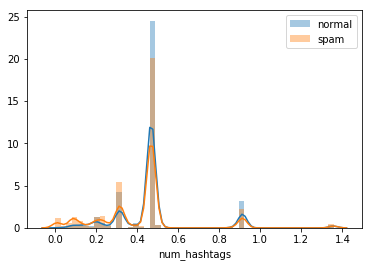

In [83]:
import matplotlib.pyplot as plt


import seaborn as sns
sns.distplot(empty.num_hashtags[empty.isSpam==0],label='normal')
sns.distplot(empty.num_hashtags[empty.isSpam==1],label='spam')
plt.legend()
plt.show()

In [28]:
empty['TFIDF']=tfidf






ValueError: Wrong number of items passed 50, placement implies 1

In [32]:
final3=empty.drop(['language','text','finalurl'],axis=1)

In [33]:
print(final3.columns)

Index(['id', 'time', 'isSpam', 'num_hashtags', 'num_mentions', 'size', 'index',
       'self_similarity', 'spamRatio'],
      dtype='object')


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
y = final3['isSpam']
X = final3.drop(['isSpam'], axis=1)
X_mat=X.as_matrix()
rs=20

X_train, X_test, y_train, y_test = train_test_split(X_mat, y
                                            , stratify=y,test_size=0.2,
                                                    random_state=42
                                                    )
model = RandomForestClassifier(max_depth=1000)
model.fit(X_train,y_train)
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)

report =  classification_report(y_test, y_pred) 


print(report)

D:\study\python\venv\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
D:\study\python\venv\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train accuracy: 0.9845444918286156
Test accuracy: 0.8178878076702919


              precision    recall  f1-score   support

           0       0.75      0.75      0.75     12929
           1       0.86      0.86      0.86     22011

   micro avg       0.82      0.82      0.82     34940
   macro avg       0.80      0.80      0.80     34940
weighted avg       0.82      0.82      0.82     34940

